# Geometric Transformation

Reference: https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html

#### OpenCV provides two transformation functions, `cv.warpAffine` and `cv.warpPerspective`, with which you can perform all kinds of transformations. `cv.warpAffine` takes a 2x3 transformation matrix while `cv.warpPerspective` takes a 3x3 transformation matrix as input.

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

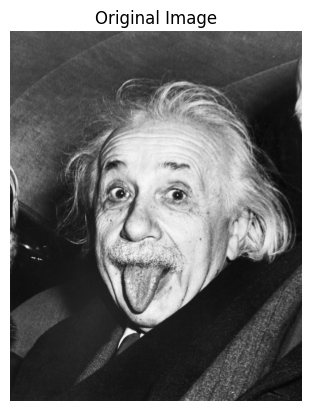

In [11]:
img = cv.imread('./assets/albert.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

In [12]:
img.shape

(3508, 2768, 3)

## Resizing

In [13]:
#Scaling by the factor of 2
res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
# cv.imshow('img', res)

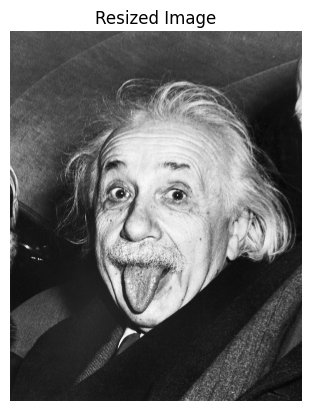

In [14]:
# Display the image using matplotlib
plt.imshow(res)
plt.title('Resized Image')
plt.axis('off')  # Hide axes
plt.show()

In [15]:
res.shape

(7016, 5536, 3)

`cv.resize()`

![image.png](assets/resize.png)

## Translation

Translation is the shifting of an object's location. 
If we know the shift in the (x,y) direction and let it be $$ (t_{x},t_{y}), $$ We can create the transformation matrix as follows:

$$
M = 
\begin{bmatrix}
1 & 0 & t_{x} \\
0 & 1 & t_{y}
\end{bmatrix}
$$

We can make it into a Numpy array of type np.float32 and pass it into the `cv.warpAffine()` function. See the below example for a shift of (700,1000):

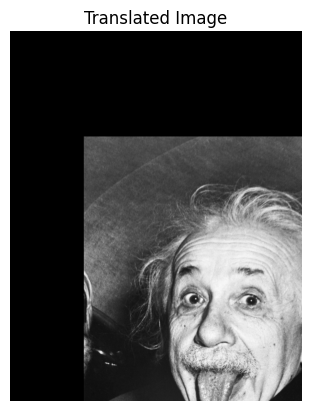

In [16]:
rows,cols,ch = img.shape
 
M = np.float32([[1,0,700],[0,1,1000]])
dst = cv.warpAffine(img,M,(cols,rows))

plt.imshow(dst)
plt.title('Translated Image')
plt.axis('off')  # Hide axes
plt.show()

The third argument of the `cv.warpAffine()` function is the size of the output image, which should be in the form of **(width, height)**. Remember width = number of columns, and height = number of rows.

In [17]:
print(dst.shape)
assert (img.shape == dst.shape)

(3508, 2768, 3)


![image.png](assets/rotation.png)

To find this transformation matrix, OpenCV provides a function, `cv.getRotationMatrix2D`. Check out the below example which rotates the image by 45 degree with respect to center with an scaling factor of 2.

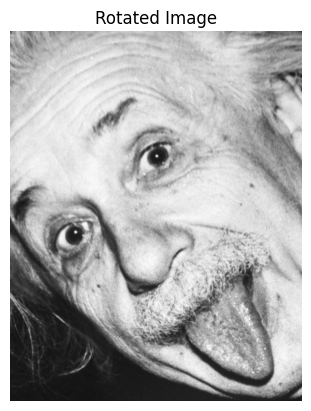

In [18]:
rows,cols,ch = img.shape
 
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),45,2)
dst = cv.warpAffine(img,M,(cols,rows))

plt.imshow(dst)
plt.title('Rotated Image')
plt.axis('off')  # Hide axes
plt.show()

# Affine Transformation

In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image. Then `cv.getAffineTransform` will create a 2x3 matrix which is to be passed to `cv.warpAffine`.

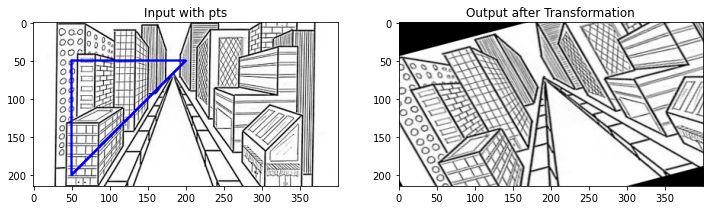

In [31]:
image = cv.imread('./assets/ORTHO.jpg')
assert image is not None, "file could not be read, check with os.path.exists()"
rows,cols,ch = image.shape
 
pts_original = np.float32([[50,50],[200,50],[50,200]])
# pts_original contains three points from the input image that you want to transform.

pts_transformed = np.float32([[10,100],[200,50],[100,250]])
# pts_transformed contains the new locations of the points after the transformation.

M = cv.getAffineTransform(pts_original,pts_transformed)
# function computes a 2x3 affine transformation matrix, M, 
# which describes how to transform the three points in pts_original to their corresponding points in pts_transformed.

dst = cv.warpAffine(image,M,(cols,rows))
plt.figure(figsize=(12, 6)) 

# Draw pts1 points as a blue rectangle on the original image
image_with_rectangle = image.copy()
cv.polylines(image_with_rectangle, [np.int32(pts_original)], isClosed=True, color=(255, 0, 0), thickness=2)


plt.subplot(121), plt.imshow(cv.cvtColor(image_with_rectangle, cv.COLOR_BGR2RGB)), plt.title('Input with pts')
plt.subplot(122), plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB)), plt.title('Output after Transformation')
plt.show()

# Perspective Transformation

For perspective transformation, we need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, we need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then the transformation matrix can be found by the function `cv.getPerspectiveTransform`. Then apply `cv.warpPerspective` with this 3x3 transformation matrix.

(215, 400, 3)


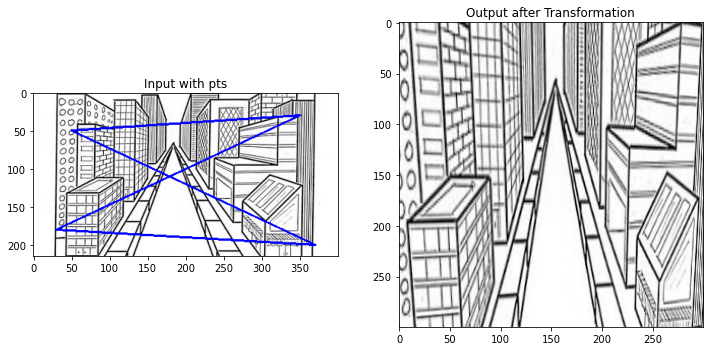

In [29]:
print(image.shape)

pts_original = np.float32([[50, 50], [350, 30], [30, 180], [370, 200]]) 
# This is a set of four points in the original image (image) that represent a quadrilateral region that we want to transform. 
# These points are typically chosen from key positions of the object in the original image.

pts_transformed = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
# This is another set of four points that define where you want the pts1 points to map in the transformed image (dst). 
# Essentially, this set describes the output quadrilateral (in this case, a 300x300 square). 

M = cv.getPerspectiveTransform(pts_original,pts_transformed)
 
dst = cv.warpPerspective(image,M,(300,300))
plt.figure(figsize=(12, 6)) 

# Draw pts1 points as a blue rectangle on the original image
image_with_rectangle = image.copy()
cv.polylines(image_with_rectangle, [np.int32(pts_original)], isClosed=True, color=(255, 0, 0), thickness=2)


plt.subplot(121), plt.imshow(cv.cvtColor(image_with_rectangle, cv.COLOR_BGR2RGB)), plt.title('Input with pts')
plt.subplot(122), plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB)), plt.title('Output after Transformation')
plt.show()

# Assignment (10 points)

## Objective: 
- Apply different geometric transformations on an image.

## Task:
- Perform scaling, rotation, and translation on an image.

In [ ]:
import cv2
import numpy as np

# Step 1: Read the image
img = cv2.imread('path_to_image')

# Step 2: Define scaling transformation matrix and apply scaling
scale_factor = __  # Fill the scale factor
scaled_img = cv2.resize(img, None, fx=scale_factor, fy=scale_factor)

# Step 3: Define rotation matrix and apply rotation
angle = __  # Fill the angle of rotation
rows, cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
rotated_img = cv2.warpAffine(img, M, (cols, rows))

# Step 4: Define translation matrix and apply translation
M = np.float32([[1, 0, __], [0, 1, __]])  # Fill the translation values
translated_img = cv2.warpAffine(img, M, (cols, rows))

# Step 5: Define the points of translation for Perspective translation and use the provided function to transform the image accordingly
pts1 =  np.float32([[],[],[],[]])
pts2 =  np.float32([[],[],[],[]])

M = cv.getPerspectiveTransform(_,_)
translated_img = cv2.warpPerspective(img, M, (cols, rows))

# Step 6: Display the transformed images using subplot function from matplotlib library
